# Noise Reduction Using CNN

## 1 - Introduction
Noise reduction can be implemented on both images and audio files. In this project I will implement it on both types. First we will start working with images as it will gives us an understanding of how Convolutional Neural Network (CNN) works. I will try my best to explain each and every step in deapth.

### 1.1 - Noise
Noise is any unwanted signal in any signal. In context of images it is  random variation of brightness or color information in images, and is usually an aspect of electronic noise (wikipedia: https://en.wikipedia.org/wiki/Image_noise). In audio, noise is unwanted or harmful sound considered unpleasant, loud, or disruptive to hearing (wikipedia: https://en.wikipedia.org/wiki/Noise).

### 1.2 - Clean image or audio
When noise is reduced or canceled out the outcome we get is clean image or audio.

### 1.3 - Steps of Training a Neural Network
Following are the steps of training a neural network:
1. Data preprocessing
2. Define Model
3. Forward Propagation
4. Calculate Loss
5. Backward Propagation
6. Update weights
7. Repeat


#### *Pre-requsite*
1. Neural Network


## 2 - Image Noise Reduction



We will be using supervised learning. The dataset we need to train the CNN will consist of
1. Noisy images
2. Clean images (Actual images)

We will feed the noisy images to CNN and it will predict a clean image (predicted image), then it will compare the clean images, predicted and actual image, and calculates the loss. Then it will update the weights accordingly. This process will repeat until we will get our desired results. This is the general overview of our training. We will discuss each and every step in detail when implementing.

We can use 2 types of dataset to train our model.
1. Dataset contains both noisy and clean images.
2. Dataset is a set of clean images and we add noise to is using python.

we will try it with 2nd approch

# Siting Dataset

In [ ]:
'''@InProceedings{MartinFTM01,
  author = {D. Martin and C. Fowlkes and D. Tal and J. Malik},
  title = {A Database of Human Segmented Natural Images and its
           Application to Evaluating Segmentation Algorithms and
           Measuring Ecological Statistics},
  booktitle = {Proc. 8th Int'l Conf. Computer Vision},
  year = {2001},
  month = {July},
  volume = {2},
  pages = {416--423}
}'''

"@InProceedings{MartinFTM01,\n  author = {D. Martin and C. Fowlkes and D. Tal and J. Malik},\n  title = {A Database of Human Segmented Natural Images and its\n           Application to Evaluating Segmentation Algorithms and\n           Measuring Ecological Statistics},\n  booktitle = {Proc. 8th Int'l Conf. Computer Vision},\n  year = {2001},\n  month = {July},\n  volume = {2},\n  pages = {416--423}\n}"

In [ ]:
! kaggle datasets download -d balraj98/berkeley-segmentation-dataset-500-bsds500

Dataset URL: https://www.kaggle.com/datasets/balraj98/berkeley-segmentation-dataset-500-bsds500
License(s): other
 89% 50.0M/56.0M [00:01<00:00, 24.5MB/s]
100% 56.0M/56.0M [00:01<00:00, 32.5MB/s]


Next step is to unzip this dataset. After unzipping we will get two folders
1. ground_truth
2. images

We will delete the ground_truth folder for now and will work with images folder. In images folder the data is already splitted into train, val and test data


In [ ]:
# import necessary libraries

import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# extract the zip file

zip_path = 'berkeley-segmentation-dataset-500-bsds500.zip'
extract_path = ''

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Now we can add noise to the images. we have almost two hundred images. These images will be our ground truth or our desired images. We will add noise to these images and these noisy images will be our input images.  

In [ ]:
# This is the function to add Noise to the images
def add_noise(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mean = np.random.randint(0, 50)
    stddev = np.random.randint(0, 50)
    gauss_noise = np.zeros_like(img, dtype=np.uint8)
    for i in range(3):
        gauss_noise[:, :, i] = cv2.randn(np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8), mean, stddev)

    gauss_noise = gauss_noise.astype(np.float32)
    noisy_img = img.astype(np.float32) + gauss_noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_RGB2BGR)
    return img, gauss_noise, noisy_img

In [ ]:
# This is the function to show the images

def show_image(img, gauss_noise, noisy_img):
    fig=plt.figure(dpi=300)

    fig.add_subplot(1,3,1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Original")

    fig.add_subplot(1,3,2)
    plt.imshow(cv2.cvtColor(gauss_noise, cv2.COLOR_BGR2GRAY), cmap="gray")
    plt.axis("off")
    plt.title("Gaussian Noise")

    fig.add_subplot(1,3,3)
    plt.imshow(noisy_img)
    plt.axis("off")
    plt.title("Combined")

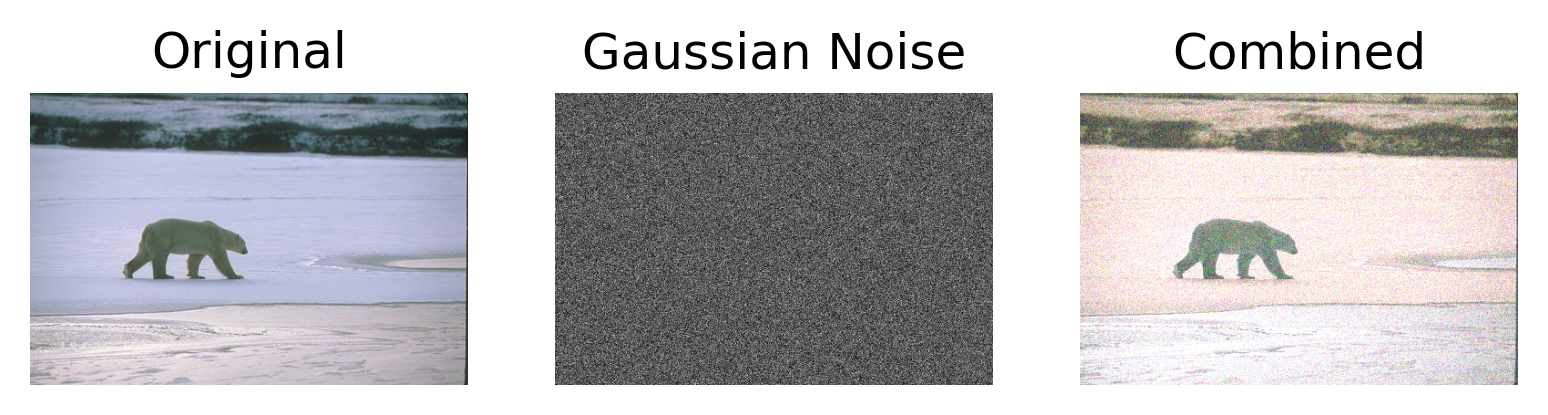

In [ ]:
img = cv2.imread('/content/images/test/100007.jpg')
img, gauss_noise, noisy_img =add_noise(img)
show_image(img, gauss_noise, noisy_img)

In [ ]:
! mkdir image

In [ ]:
! mkdir '/content/image/'train
! mkdir '/content/image/train/'clean
! mkdir '/content/image/train/'noisy

In [ ]:
! mkdir '/content/image/'val
! mkdir '/content/image/val/'clean
! mkdir '/content/image/val/'noisy

In [ ]:
! mkdir '/content/image/'test
! mkdir '/content/image/test/'clean
! mkdir '/content/image/test/'noisy

In [ ]:
def add_noise_to_jpg(folder_path, save_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Failed to load image {img_path}")
                continue
            img, gauss_noise, noisy_img = add_noise(img)
            # show_image(img, gauss_noise, noisy_img)
            cv2.imwrite(os.path.join(save_path, filename), noisy_img)
    print("Noise added to all images")

In [ ]:
add_noise_to_jpg('/content/images/train','/content/image/train/noisy')
add_noise_to_jpg('/content/images/val','/content/image/val/noisy')
add_noise_to_jpg('/content/images/test','/content/image/test/noisy')

Noise added to all images
Noise added to all images
Noise added to all images


In [ ]:
def move_to_image_folder(folder_path, move_path):
  for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
      img_path = os.path.join(folder_path, filename)
      img = cv2.imread(img_path)
      if img is None:
          print(f"Failed to load image {img_path}")
          continue
      cv2.imwrite(os.path.join(move_path, filename), img)


In [ ]:
move_to_image_folder('/content/images/train','/content/image/train/clean')
move_to_image_folder('/content/images/val','/content/image/val/clean')
move_to_image_folder('/content/images/test','/content/image/test/clean')

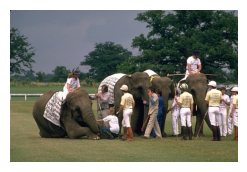

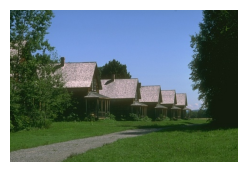

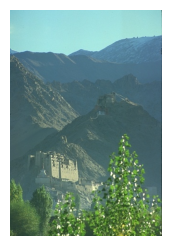

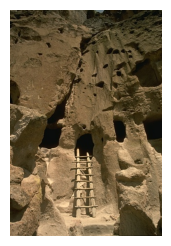

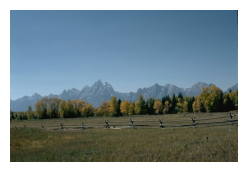

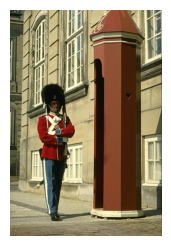

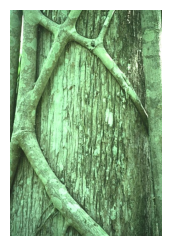

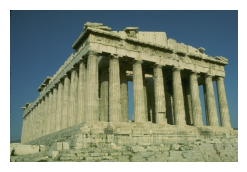

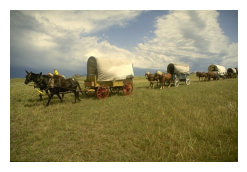

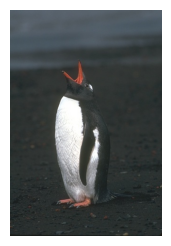

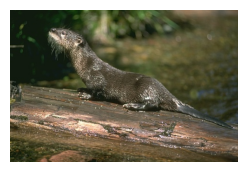

In [ ]:
i = 0
for filename in os.listdir('/content/image/train/clean'):
  img_path = os.path.join('/content/image/train/clean', filename)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  fig = plt.figure(figsize=(10, 10))
  #fig=plt.figure(dpi=300)
  fig.add_subplot(3,3, 1)
  plt.imshow(img)
  plt.axis("off")
  i+=1
  if i > 10:
    break

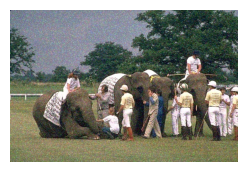

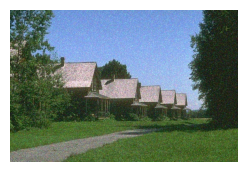

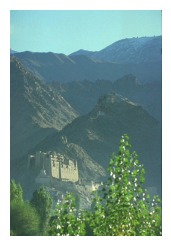

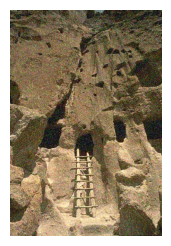

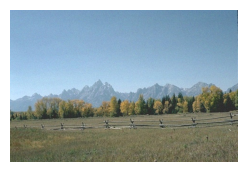

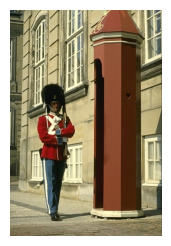

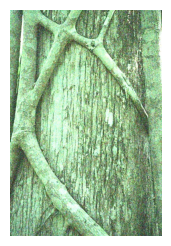

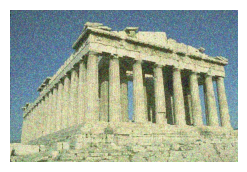

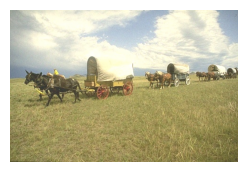

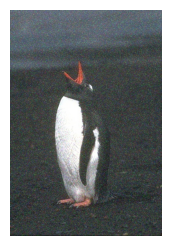

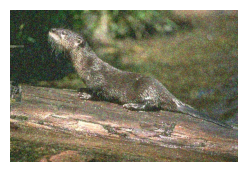

In [ ]:
i = 0
for filename in os.listdir('/content/image/train/noisy'):
  img_path = os.path.join('/content/image/train/noisy', filename)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  fig = plt.figure(figsize=(10, 10))
  #fig=plt.figure(dpi=300)
  fig.add_subplot(3,3, 1)
  plt.imshow(img)
  plt.axis("off")
  i+=1
  if i > 10:
    break

In [ ]:
!rm -r /content/ground_truth/
!rm -r /content/images/
!rm -r /content/berkeley-segmentation-dataset-500-bsds500.zip

In [ ]:
train_dir = '/content/image/train'
val_dir = '/content/image/val'
test_dir = '/content/image/test'

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

IMG_SIZE = (256, 256)
BATCH_SIZE = 64

# Read a TensorFlow dataset from each the training, validation, and test directory

### START YOUR CODE HERE ### (3 LOC)
train_ds = image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)
val_ds = image_dataset_from_directory(
    val_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)
test_ds = image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
)
### END YOUR CODE HERE ###

Found 400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['clean', 'noisy']


In [ ]:
for images, labels in train_ds.take(1):
       print(labels.shape)

(64,)


In [ ]:
batch = train_ds.take(1)

for image_batch, label_batch in batch:
  print(f'x shape: {image_batch.shape}')
  print(f'y shape: {label_batch.shape}\n')

  print(f'x example: {image_batch[0]}')
  print(f'y example: {label_batch[0]}\n')

x shape: (64, 256, 256, 3)
y shape: (64,)

x example: [[[146.80069  206.8428   213.00858 ]
  [170.43433  202.03438  229.19803 ]
  [147.30264  195.36584  213.4273  ]
  ...
  [140.85747  187.48915  223.03087 ]
  [127.27034  171.40842  196.24419 ]
  [140.57135  210.45247  235.71283 ]]

 [[152.67401  218.76581  233.4246  ]
  [169.03813  207.8629   235.31595 ]
  [161.25624  200.57578  229.56874 ]
  ...
  [122.89491  175.65689  203.50923 ]
  [135.3215   193.80994  208.98048 ]
  [140.66217  219.98654  240.46263 ]]

 [[122.97595  192.67447  217.68033 ]
  [159.41066  206.21523  235.21066 ]
  [182.42905  218.88281  251.18686 ]
  ...
  [130.19684  187.92535  207.5944  ]
  [116.308716 184.92903  194.13724 ]
  [140.67513  222.45842  245.09848 ]]

 ...

 [[ 74.60326  117.23122  109.210205]
  [ 69.07003  129.74126  128.18527 ]
  [ 65.69162  124.56966  135.03603 ]
  ...
  [181.39622  211.67834  222.96655 ]
  [154.90259  219.00975  226.82446 ]
  [182.60834  219.21146  234.65173 ]]

 [[ 72.93175  151.23

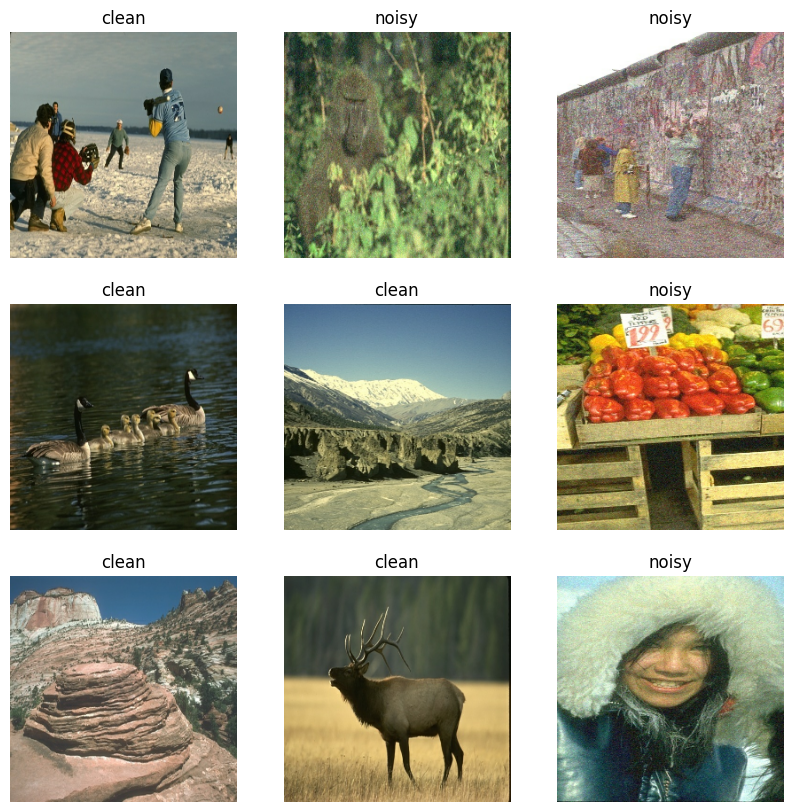

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in batch:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[label_batch[i]])
    plt.axis("off")


In [ ]:
batch = train_ds.take(1)
for image_batch, label_batch in batch:
  print(np.min(image_batch[0]), np.max(image_batch[0]))

28.186302 255.0


In [ ]:
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./255)

In [ ]:
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
batch = train_ds.take(1)
for image_batch, label_batch in batch:
  print(np.min(image_batch[0]), np.max(image_batch[0]))

0.035848133 1.0


In [ ]:
# TODO
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet(input_shape=(256, 256, 3)):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model

# Create the U-Net model for noise reduction
unet_model = unet(input_shape=(256, 256, 3))
unet_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
unet_model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_105 (Conv2D)         (None, 256, 256, 64)         1792      ['input_6[0][0]']             
                                                                                                  
 conv2d_106 (Conv2D)         (None, 256, 256, 64)         36928     ['conv2d_105[0][0]']          
                                                                                                  
 max_pooling2d_20 (MaxPooli  (None, 128, 128, 64)         0         ['conv2d_106[0][0]']          
 ng2D)                                                                                      

In [ ]:
history = unet_model.fit(train_ds,
    epochs=50,
    validation_data=val_ds)

In [ ]:
def plot_training_history(history):
    # Get training and validation loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get training and validation metrics
    mse = history.history['mse']
    val_mse = history.history['val_mse']

    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation MSE
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mse, 'ro', label='Training MSE')
    plt.plot(epochs, val_mse, 'r', label='Validation MSE')
    plt.title('Training and Validation MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_training_history(history)

CONTINUED